## Step 0: Libraries

In [970]:
import numpy as np
import pandas as pd
import time
from datetime import date
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None) 
import seaborn as sns 
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import chi2_contingency
from scipy.spatial.distance import cdist
#import the model
from sklearn import linear_model
#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Step 1: Read the file

- the csv-file has no header names -> create the header names
- the command pd.read need the additiona "header=None", so that the first row will be read as the second row and the header names become the first row

- create the header names

In [971]:
col = ['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 'Bank Accounts Open', 'Overdraft Protection', 'Credit Rating', 'Credit Cards Held', 'Homes Owned', 'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']
col

['Customer Number',
 'Offer Accepted',
 'Reward',
 'Mailer Type',
 'Income Level',
 'Bank Accounts Open',
 'Overdraft Protection',
 'Credit Rating',
 'Credit Cards Held',
 'Homes Owned',
 'Household Size',
 'Own Your Home',
 'Average Balance',
 'Q1 Balance',
 'Q2 Balance',
 'Q3 Balance',
 'Q4 Balance']

- and standardize the header names

In [972]:
col = [x.lower().replace(" ", "_") for x in col]
col

['customer_number',
 'offer_accepted',
 'reward',
 'mailer_type',
 'income_level',
 'bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'household_size',
 'own_your_home',
 'average_balance',
 'q1_balance',
 'q2_balance',
 'q3_balance',
 'q4_balance']

- read the csv file ad add the header names

In [973]:
df = pd.read_csv('creditcardmarketing.csv', header=None, names=col )

## Step 2 : Wrangling and Explore the data

In [974]:
df.head()

customer_number offer_accepted     reward mailer_type income_level  \
0                1             No  Air Miles      Letter         High   
1                2             No  Air Miles      Letter       Medium   
2                3             No  Air Miles    Postcard         High   
3                4             No  Air Miles      Letter       Medium   
4                5             No  Air Miles      Letter       Medium   

   bank_accounts_open overdraft_protection credit_rating  credit_cards_held  \
0                   1                   No          High                  2   
1                   1                   No        Medium                  2   
2                   2                   No        Medium                  2   
3                   2                   No          High                  1   
4                   1                   No        Medium                  2   

   homes_owned  household_size own_your_home  average_balance  q1_balance  \
0            1               4            No          1160.75      1669.0   
1            2               5           Yes           147.25        39.0   
2            1               2           Yes           276.50       367.0   
3            1               4            No          1219.00      1578.0   
4            1               6           Yes          1211.00      2140.0   

   q2_balance  q3_balance  q4_balance  
0       877.0      1095.0      1002.0  
1       106.0        78.0       366.0  
2       352.0       145.0       242.0  
3      1760.0      1119.0       419.0  
4      1357.0       982.0       365.0

In [975]:
df.shape

(18000, 17)

- check the datatypes

In [976]:
df.dtypes

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

Result: The datatypes are ok.

- Check the missing values

In [977]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

Result: Missing values exists in the dataset.

In [978]:
df.isnull().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

- Our decision: we drop the missing values. The missing values concerns 24 rows. For these 24 there are no numeric value for the colummns average_balance to q4_balance. 

In [979]:
#drop the missing values
df=df.dropna()

In [980]:
df.isnull().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

- check the duplicates

In [981]:
df.duplicated().sum()

0

In [982]:
df.describe()

customer_number  bank_accounts_open  credit_cards_held   homes_owned  \
count     17976.000000        17976.000000       17976.000000  17976.000000   
mean       8999.727192            1.255730           1.903427      1.203549   
std        5196.958865            0.472405           0.797086      0.427446   
min           1.000000            1.000000           1.000000      1.000000   
25%        4498.750000            1.000000           1.000000      1.000000   
50%        9000.500000            1.000000           2.000000      1.000000   
75%       13501.250000            1.000000           2.000000      1.000000   
max       18000.000000            3.000000           4.000000      3.000000   

       household_size  average_balance    q1_balance    q2_balance  \
count    17976.000000     17976.000000  17976.000000  17976.000000   
mean         3.499110       940.515562    910.450656    999.392190   
std          1.114476       350.297837    620.077060    457.402268   
min          1.000000        48.250000      0.000000      0.000000   
25%          3.000000       787.500000    392.750000    663.000000   
50%          3.000000      1007.000000    772.000000   1032.000000   
75%          4.000000      1153.250000   1521.000000   1342.000000   
max          9.000000      3366.250000   3450.000000   3421.000000   

         q3_balance    q4_balance  
count  17976.000000  17976.000000  
mean    1042.033600    810.185803  
std      553.452599    559.001365  
min        0.000000      0.000000  
25%      633.000000    363.000000  
50%      945.500000    703.000000  
75%     1463.000000   1212.000000  
max     3823.000000   4215.000000

- column: Customer Number - We do not need the column.

In [983]:
df = df.drop(['customer_number'], axis=1)
df

offer_accepted     reward mailer_type income_level  bank_accounts_open  \
0                 No  Air Miles      Letter         High                   1   
1                 No  Air Miles      Letter       Medium                   1   
2                 No  Air Miles    Postcard         High                   2   
3                 No  Air Miles      Letter       Medium                   2   
4                 No  Air Miles      Letter       Medium                   1   
...              ...        ...         ...          ...                 ...   
17995             No  Cash Back      Letter         High                   1   
17996             No  Cash Back      Letter         High                   1   
17997             No  Cash Back      Letter         High                   1   
17998             No  Cash Back      Letter       Medium                   1   
17999             No  Cash Back      Letter          Low                   2   

      overdraft_protection credit_rating  credit_cards_held  homes_owned  \
0                       No          High                  2            1   
1                       No        Medium                  2            2   
2                       No        Medium                  2            1   
3                       No          High                  1            1   
4                       No        Medium                  2            1   
...                    ...           ...                ...          ...   
17995                   No           Low                  1            1   
17996                   No           Low                  3            1   
17997                   No           Low                  2            1   
17998                   No        Medium                  4            2   
17999                   No        Medium                  2            1   

       household_size own_your_home  average_balance  q1_balance  q2_balance  \
0                   4            No          1160.75      1669.0       877.0   
1                   5           Yes           147.25        39.0       106.0   
2                   2           Yes           276.50       367.0       352.0   
3                   4            No          1219.00      1578.0      1760.0   
4                   6           Yes          1211.00      2140.0      1357.0   
...               ...           ...              ...         ...         ...   
17995               5           Yes           167.50       136.0        65.0   
17996               3           Yes           850.50       984.0       940.0   
17997               4            No          1087.25       918.0       767.0   
17998               2           Yes          1022.25       626.0       983.0   
17999               3            No          1056.00       265.0      1378.0   

       q3_balance  q4_balance  
0          1095.0      1002.0  
1            78.0       366.0  
2           145.0       242.0  
3          1119.0       419.0  
4           982.0       365.0  
...           ...         ...  
17995        71.0       398.0  
17996       943.0       535.0  
17997      1170.0      1494.0  
17998       865.0      1615.0  
17999      1978.0       603.0  

[17976 rows x 16 columns]

- We have the average balance. This columns shows us the same like the four columns q1_balance to q4_balance. 
- Our decision: We drop the column average_balance. We know that is better to use less features than possible, but we will see what happens. 

In [984]:
df = df.drop(['average_balance'], axis=1)
df

offer_accepted     reward mailer_type income_level  bank_accounts_open  \
0                 No  Air Miles      Letter         High                   1   
1                 No  Air Miles      Letter       Medium                   1   
2                 No  Air Miles    Postcard         High                   2   
3                 No  Air Miles      Letter       Medium                   2   
4                 No  Air Miles      Letter       Medium                   1   
...              ...        ...         ...          ...                 ...   
17995             No  Cash Back      Letter         High                   1   
17996             No  Cash Back      Letter         High                   1   
17997             No  Cash Back      Letter         High                   1   
17998             No  Cash Back      Letter       Medium                   1   
17999             No  Cash Back      Letter          Low                   2   

      overdraft_protection credit_rating  credit_cards_held  homes_owned  \
0                       No          High                  2            1   
1                       No        Medium                  2            2   
2                       No        Medium                  2            1   
3                       No          High                  1            1   
4                       No        Medium                  2            1   
...                    ...           ...                ...          ...   
17995                   No           Low                  1            1   
17996                   No           Low                  3            1   
17997                   No           Low                  2            1   
17998                   No        Medium                  4            2   
17999                   No        Medium                  2            1   

       household_size own_your_home  q1_balance  q2_balance  q3_balance  \
0                   4            No      1669.0       877.0      1095.0   
1                   5           Yes        39.0       106.0        78.0   
2                   2           Yes       367.0       352.0       145.0   
3                   4            No      1578.0      1760.0      1119.0   
4                   6           Yes      2140.0      1357.0       982.0   
...               ...           ...         ...         ...         ...   
17995               5           Yes       136.0        65.0        71.0   
17996               3           Yes       984.0       940.0       943.0   
17997               4            No       918.0       767.0      1170.0   
17998               2           Yes       626.0       983.0       865.0   
17999               3            No       265.0      1378.0      1978.0   

       q4_balance  
0          1002.0  
1           366.0  
2           242.0  
3           419.0  
4           365.0  
...           ...  
17995       398.0  
17996       535.0  
17997      1494.0  
17998      1615.0  
17999       603.0  

[17976 rows x 15 columns]

## Step 3: Explore the data deeper

- numerical data

- create a df only with numerical data

In [985]:
df_num = df.select_dtypes(include = np.number)
df_num

bank_accounts_open  credit_cards_held  homes_owned  household_size  \
0                       1                  2            1               4   
1                       1                  2            2               5   
2                       2                  2            1               2   
3                       2                  1            1               4   
4                       1                  2            1               6   
...                   ...                ...          ...             ...   
17995                   1                  1            1               5   
17996                   1                  3            1               3   
17997                   1                  2            1               4   
17998                   1                  4            2               2   
17999                   2                  2            1               3   

       q1_balance  q2_balance  q3_balance  q4_balance  
0          1669.0       877.0      1095.0      1002.0  
1            39.0       106.0        78.0       366.0  
2           367.0       352.0       145.0       242.0  
3          1578.0      1760.0      1119.0       419.0  
4          2140.0      1357.0       982.0       365.0  
...           ...         ...         ...         ...  
17995       136.0        65.0        71.0       398.0  
17996       984.0       940.0       943.0       535.0  
17997       918.0       767.0      1170.0      1494.0  
17998       626.0       983.0       865.0      1615.0  
17999       265.0      1378.0      1978.0       603.0  

[17976 rows x 8 columns]

<AxesSubplot:xlabel='q1_balance'>

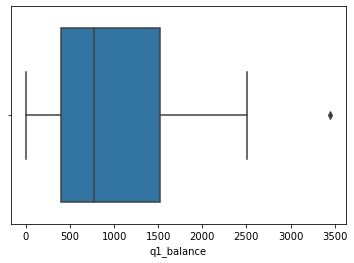

In [986]:
sns.boxplot(x=df_num['q1_balance'])

<AxesSubplot:xlabel='q2_balance'>

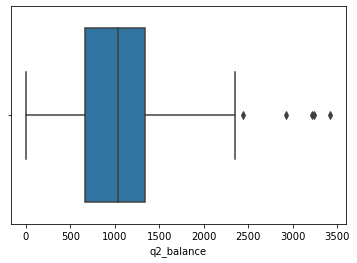

In [987]:
sns.boxplot(x=df_num['q2_balance'])

<AxesSubplot:xlabel='q3_balance'>

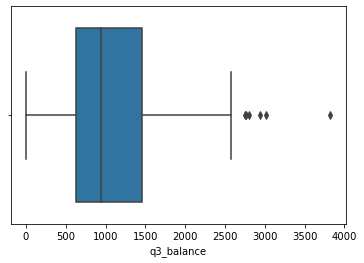

In [988]:
sns.boxplot(x=df_num['q3_balance'])

<AxesSubplot:xlabel='q4_balance'>

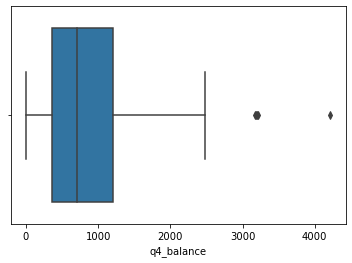

In [989]:
sns.boxplot(x=df_num['q4_balance'])

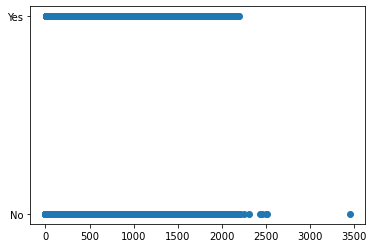

In [990]:
plt.scatter(x=df['q1_balance'], y=df['offer_accepted'])
plt.show()

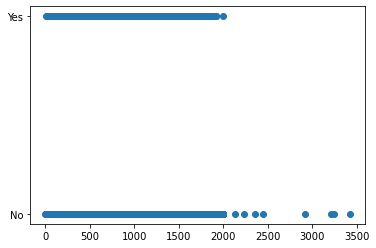

In [991]:
plt.scatter(x=df['q2_balance'], y=df['offer_accepted'])
plt.show()

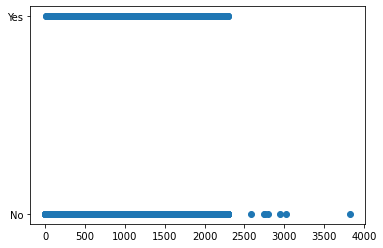

In [992]:
plt.scatter(x=df['q3_balance'], y=df['offer_accepted'])
plt.show()

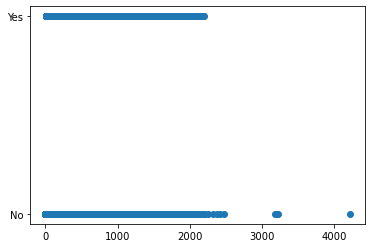

In [993]:
plt.scatter(x=df['q4_balance'], y=df['offer_accepted'])
plt.show()

<AxesSubplot:xlabel='household_size'>

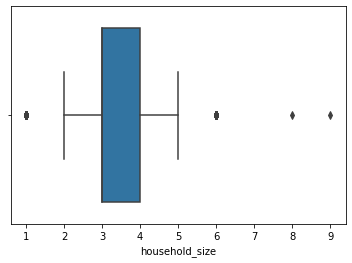

In [994]:
sns.boxplot(x=df_num['household_size']) 

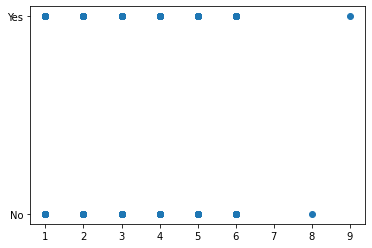

In [995]:
plt.scatter(x=df['household_size'], y=df['offer_accepted'])
plt.show()

<AxesSubplot:xlabel='homes_owned'>

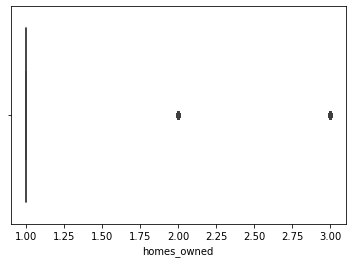

In [996]:
sns.boxplot(x=df_num['homes_owned'])

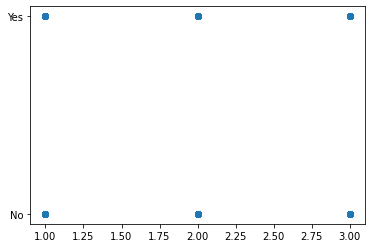

In [997]:
plt.scatter(x=df['homes_owned'], y=df['offer_accepted'])
plt.show()

<AxesSubplot:xlabel='credit_cards_held'>

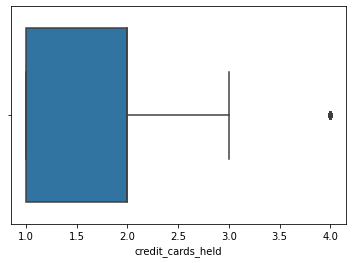

In [998]:
sns.boxplot(x=df_num['credit_cards_held'])

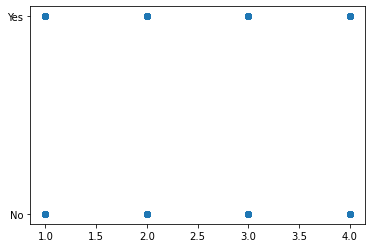

In [999]:
plt.scatter(x=df['credit_cards_held'], y=df['offer_accepted'])
plt.show()

<AxesSubplot:xlabel='bank_accounts_open'>

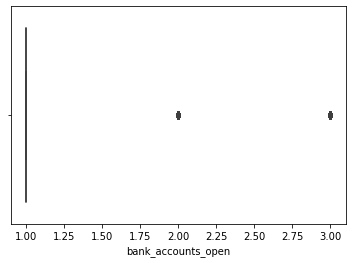

In [1000]:
sns.boxplot(x=df_num['bank_accounts_open'])

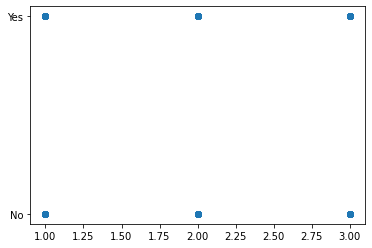

In [1001]:
plt.scatter(x=df['bank_accounts_open'], y=df['offer_accepted'])
plt.show()

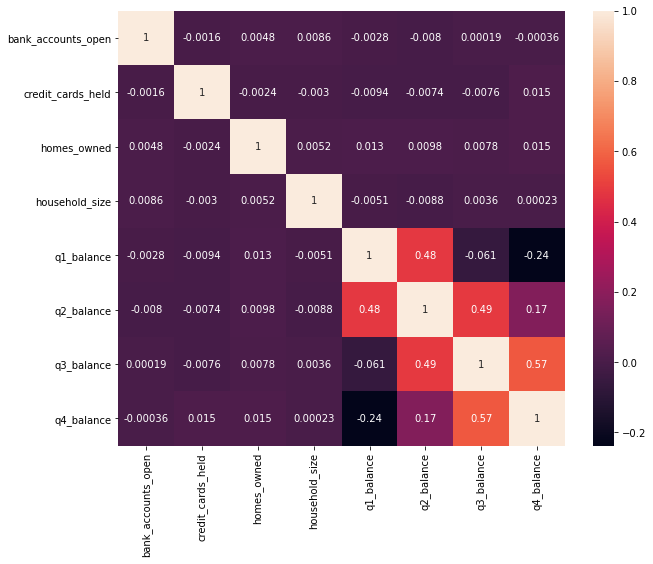

In [1002]:
corr_matrix=df_num.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'bank_accounts_open'}>,
        <AxesSubplot:title={'center':'credit_cards_held'}>,
        <AxesSubplot:title={'center':'homes_owned'}>,
        <AxesSubplot:title={'center':'household_size'}>],
       [<AxesSubplot:title={'center':'q1_balance'}>,
        <AxesSubplot:title={'center':'q2_balance'}>,
        <AxesSubplot:title={'center':'q3_balance'}>,
        <AxesSubplot:title={'center':'q4_balance'}>]], dtype=object)

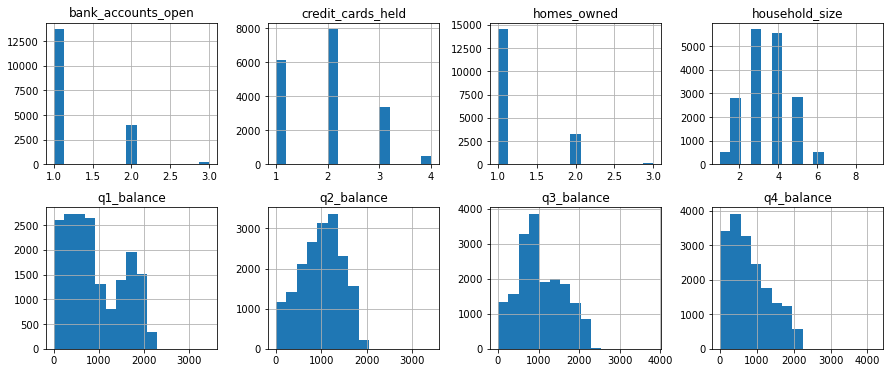

In [1003]:
df_num.hist(bins=15,figsize=(15,6), layout=(2,4))

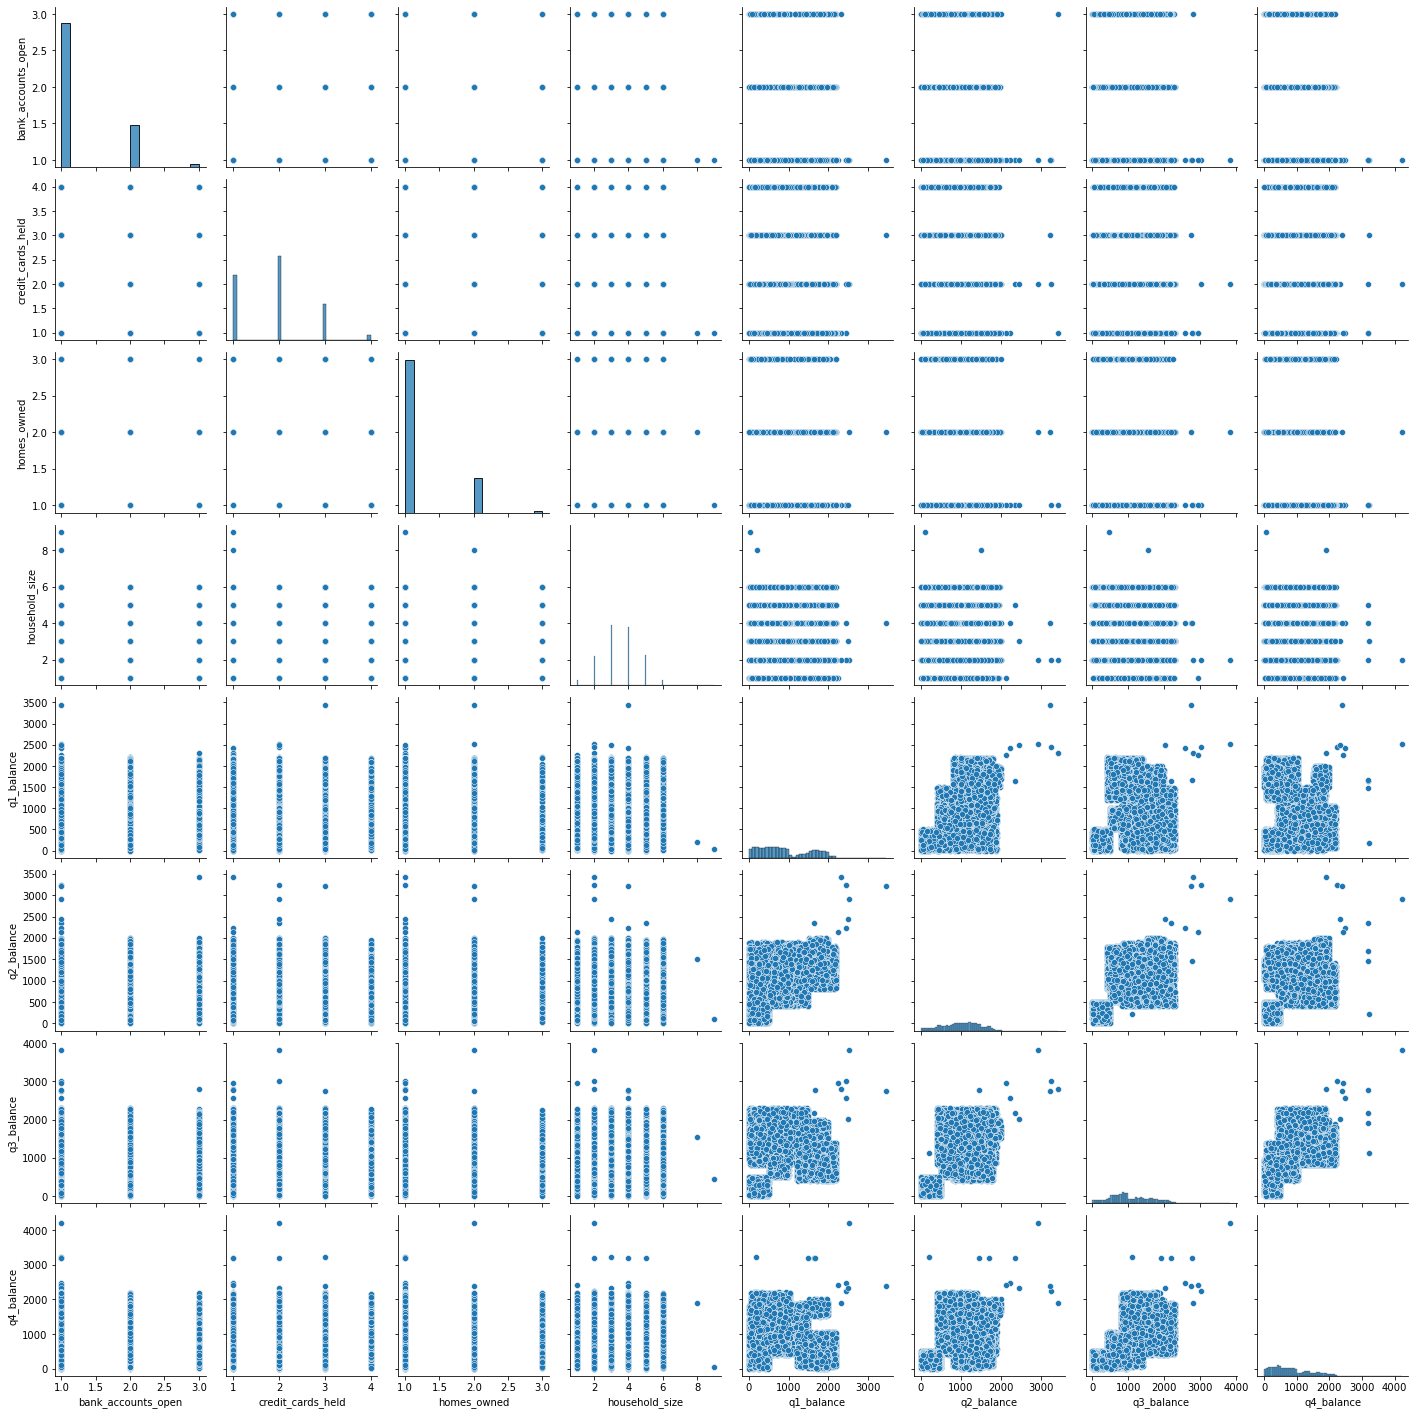

In [1004]:
sns.pairplot(df_num)

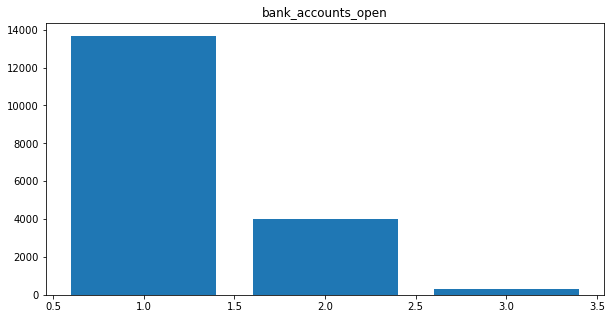

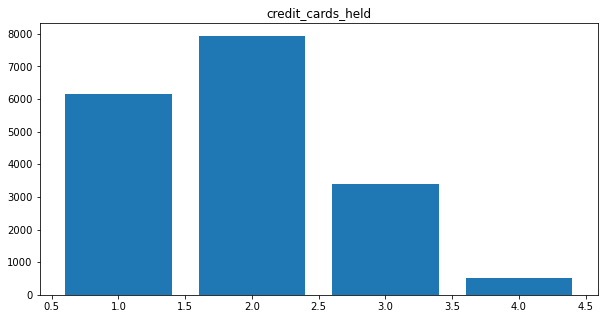

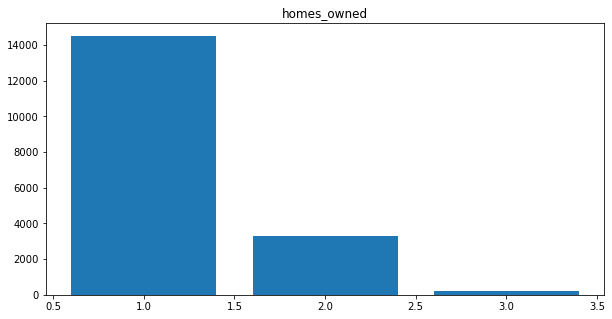

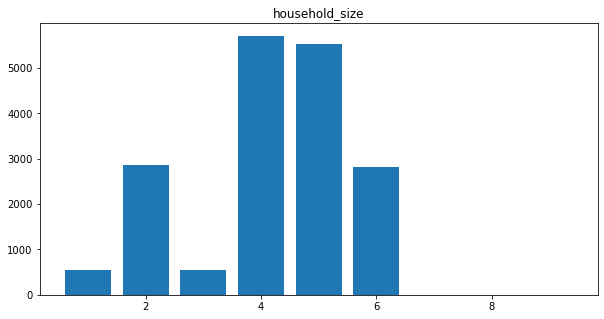

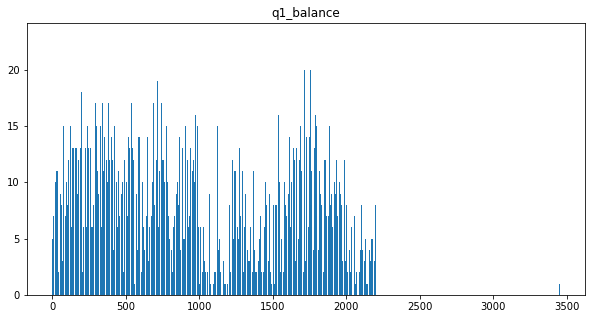

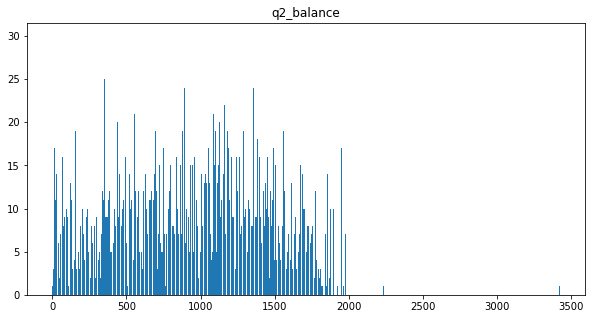

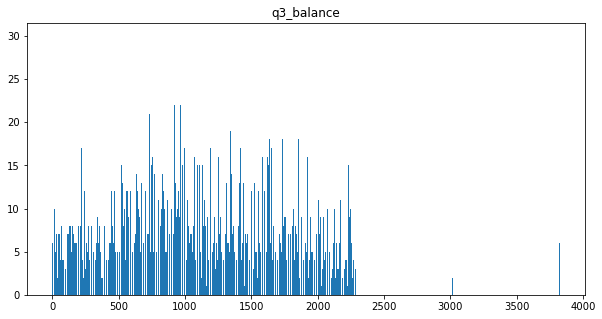

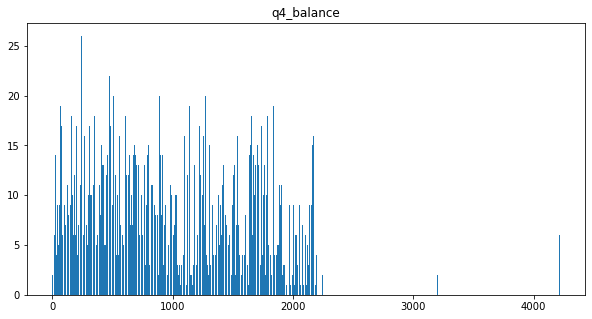

In [1005]:
for c in df_num:
    plt.figure(figsize=(10,5))
    plt.bar(df_num[c].unique(), df_num[c].value_counts())
    plt.title(c)
    plt.show();

- check the categorical data

- create a df only with categorical data

In [1006]:
df_cat = df.select_dtypes(include = np.object)
df_cat

offer_accepted     reward mailer_type income_level overdraft_protection  \
0                 No  Air Miles      Letter         High                   No   
1                 No  Air Miles      Letter       Medium                   No   
2                 No  Air Miles    Postcard         High                   No   
3                 No  Air Miles      Letter       Medium                   No   
4                 No  Air Miles      Letter       Medium                   No   
...              ...        ...         ...          ...                  ...   
17995             No  Cash Back      Letter         High                   No   
17996             No  Cash Back      Letter         High                   No   
17997             No  Cash Back      Letter         High                   No   
17998             No  Cash Back      Letter       Medium                   No   
17999             No  Cash Back      Letter          Low                   No   

      credit_rating own_your_home  
0              High            No  
1            Medium           Yes  
2            Medium           Yes  
3              High            No  
4            Medium           Yes  
...             ...           ...  
17995           Low           Yes  
17996           Low           Yes  
17997           Low            No  
17998        Medium           Yes  
17999        Medium            No  

[17976 rows x 7 columns]

Frequency analysis of column:  offer_accepted
Frequency analysis of column:  reward
Frequency analysis of column:  mailer_type
Frequency analysis of column:  income_level
Frequency analysis of column:  overdraft_protection
Frequency analysis of column:  credit_rating
Frequency analysis of column:  own_your_home


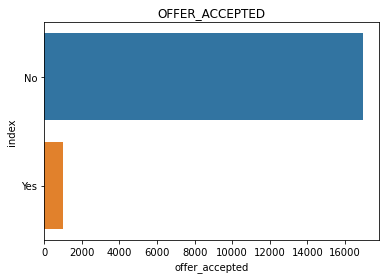

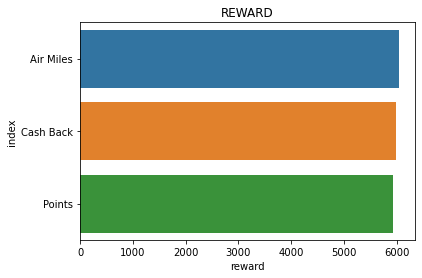

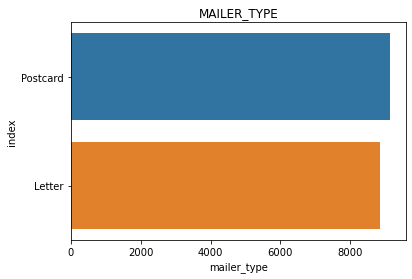

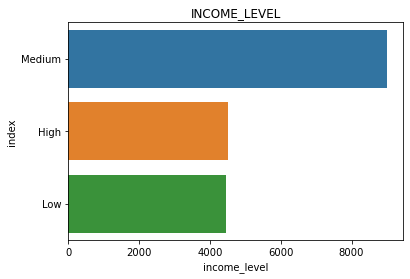

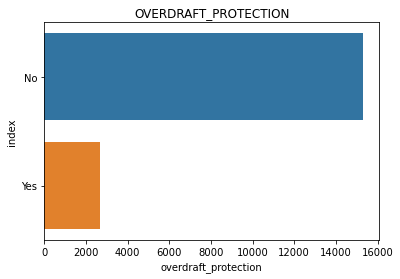

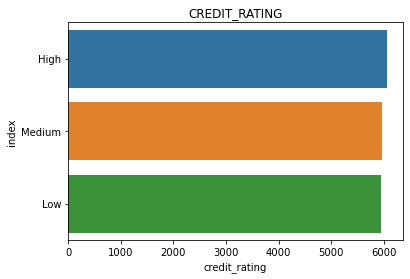

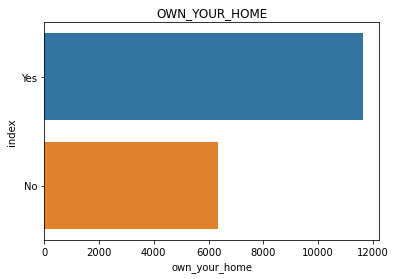

<Figure size 432x288 with 0 Axes>

In [1007]:
cols_cat = list(df_cat.select_dtypes(include=['object']).columns)

for col in cols_cat:
    print("Frequency analysis of column: ",col)
    my_data = df[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
    plt.figure()
    print

- plot a grapgh with numerical and categorical data

<AxesSubplot:xlabel='offer_accepted', ylabel='q1_balance'>

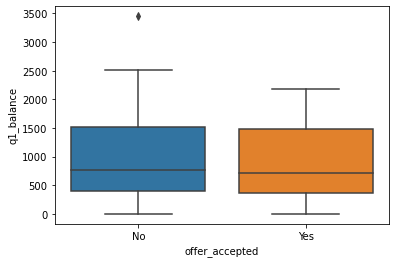

In [1008]:
sns.boxplot(x=df['offer_accepted'], y=df['q1_balance'])

In [1009]:
df_num['q1_balance'].value_counts()

81.0      23
675.0     23
676.0     22
823.0     22
480.0     21
          ..
2092.0     1
1182.0     1
1150.0     1
2185.0     1
1174.0     1
Name: q1_balance, Length: 2158, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='q2_balance'>

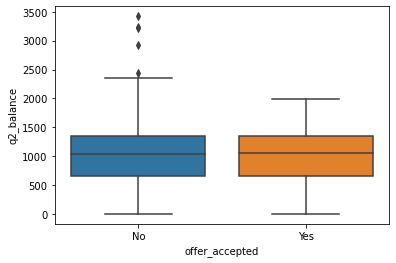

In [1010]:
sns.boxplot(x=df['offer_accepted'], y=df['q2_balance'])

<AxesSubplot:xlabel='offer_accepted', ylabel='q3_balance'>

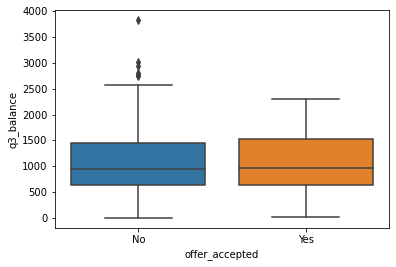

In [1011]:
sns.boxplot(x=df['offer_accepted'], y=df['q3_balance'])

<AxesSubplot:xlabel='offer_accepted', ylabel='q4_balance'>

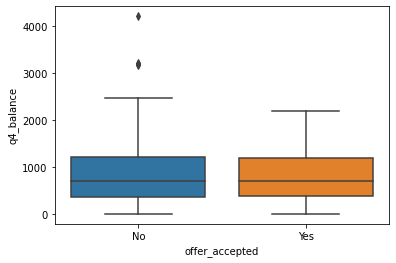

In [1012]:
sns.boxplot(x=df['offer_accepted'], y=df['q4_balance'])

Result column average balance The boxplot shows a lot of outliers in the average_balanced. We will try to discover the influence of the outliers of the accuracy of our model. Because the imbalanced step will improve our dataset for a better model accuracy. And that could be happen by doing reduce the dataset. If we drop the outliers we will reduce the dataset too. So we will create three datasets:
1. All outliers stays in the data set.
2. We drop all outliers with the IQR-Limits.
3. we drop the outliers only with a 95 % upper limit and a 5% lower limit.

<AxesSubplot:xlabel='offer_accepted', ylabel='household_size'>

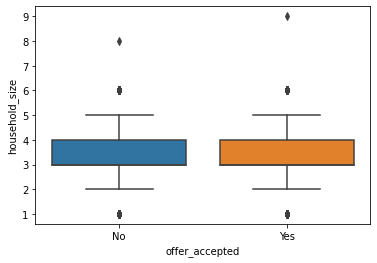

In [1013]:
sns.boxplot(x=df['offer_accepted'], y=df['household_size'])

In [1014]:
df_num['household_size'].value_counts()

3    5705
4    5532
5    2851
2    2809
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64

Result for the column household_size: After we drop the ouliers from the column average_balance we wll checkt if the outzliers houshold_size withe the amounts of 8 and 9 exists. If yes: We will drop then. Because in a steplater we will noramlize the datat of the column household_size. Bute the amounts of 8 and 9 are only one time int he dataset but both will distort the normalization of the colum household_size. The influence of both amount are to big for only two rows (one row for each number).

<AxesSubplot:xlabel='offer_accepted', ylabel='homes_owned'>

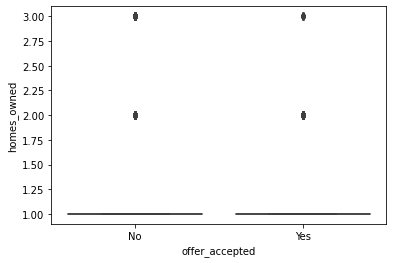

In [1015]:
sns.boxplot(x=df['offer_accepted'], y=df['homes_owned'])

In [1016]:
df_num['homes_owned'].value_counts()

1    14502
2     3289
3      185
Name: homes_owned, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='credit_cards_held'>

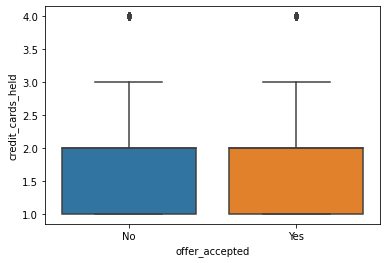

In [1017]:
sns.boxplot(x=df['offer_accepted'], y=df['credit_cards_held'])

In [1018]:
df_num['credit_cards_held'].value_counts()

2    7933
1    6147
3    3381
4     515
Name: credit_cards_held, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='bank_accounts_open'>

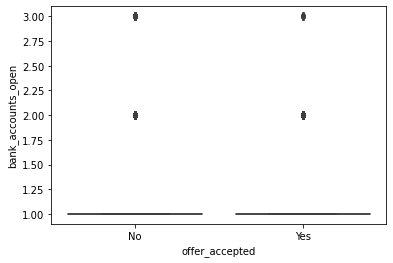

In [1019]:
sns.boxplot(x=df['offer_accepted'], y=df['bank_accounts_open'])

In [1020]:
df_num['bank_accounts_open'].value_counts()

1    13674
2     4007
3      295
Name: bank_accounts_open, dtype: int64

- Outliers

1. All outliers stays in the data set.


In [1021]:
df1 = df

In [1022]:
df1.shape, df.shape

((17976, 15), (17976, 15))

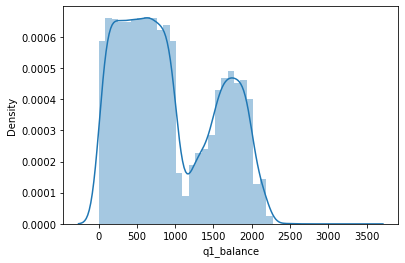

In [1023]:
sns.distplot(df1['q1_balance'])
plt.show()

2. We drop all outliers with the IQR-Limits.


In [1024]:
df2 = df

In [1025]:
df2.shape, df.shape

((17976, 15), (17976, 15))

<AxesSubplot:xlabel='offer_accepted', ylabel='q1_balance'>

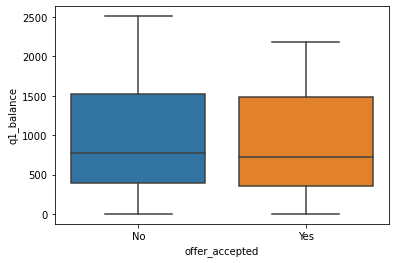

In [1026]:
iqr2 = np.percentile(df2['q1_balance'],75) - np.percentile(df2['q1_balance'],25)
upper_limit2 = np.percentile(df2['q1_balance'],75) + 1.5*iqr2
lower_limit2 = np.percentile(df2['q1_balance'],25) - 1.5*iqr2
df2 = df2[(df2['q1_balance']>lower_limit2) & (df2['q1_balance']<upper_limit2)]
sns.boxplot(x=df2['offer_accepted'], y=df2['q1_balance'])

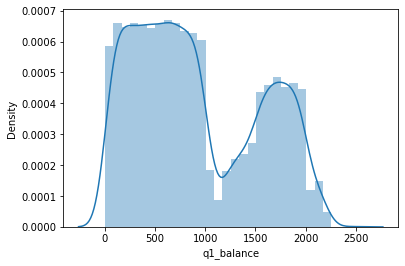

In [1027]:
sns.distplot(df2['q1_balance'])
plt.show()

In [1028]:
df2['household_size'].value_counts()

3    5705
4    5531
5    2851
2    2809
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='q2_balance'>

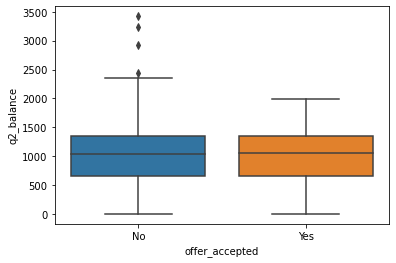

In [1029]:
sns.boxplot(x=df2['offer_accepted'], y=df2['q2_balance'])

<AxesSubplot:xlabel='offer_accepted', ylabel='q2_balance'>

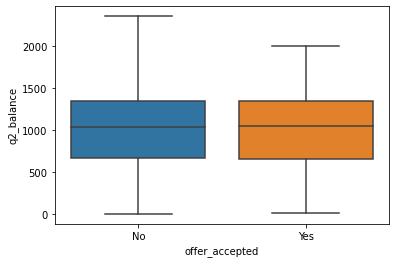

In [1030]:
iqr2_2 = np.percentile(df2['q2_balance'],75) - np.percentile(df2['q2_balance'],25)
upper_limit2_2 = np.percentile(df2['q2_balance'],75) + 1.5*iqr2_2
lower_limit2_2 = np.percentile(df2['q2_balance'],25) - 1.5*iqr2_2
df2 = df2[(df2['q2_balance']>lower_limit2_2) & (df2['q2_balance']<upper_limit2_2)]
sns.boxplot(x=df2['offer_accepted'], y=df2['q2_balance'])

In [1031]:
df2['household_size'].value_counts()

3    5704
4    5531
5    2851
2    2806
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='q3_balance'>

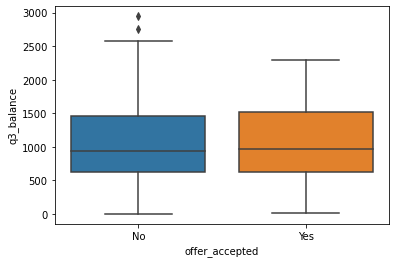

In [1032]:
sns.boxplot(x=df2['offer_accepted'], y=df2['q3_balance'])

<AxesSubplot:xlabel='offer_accepted', ylabel='q3_balance'>

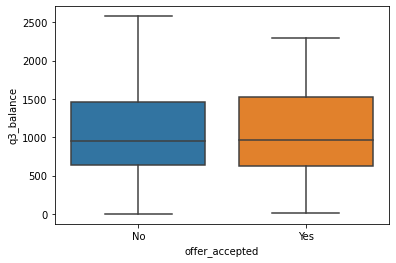

In [1033]:
iqr2_3 = np.percentile(df2['q3_balance'],75) - np.percentile(df2['q3_balance'],25)
upper_limit2_3 = np.percentile(df2['q3_balance'],75) + 1.5*iqr2_3
lower_limit2_3 = np.percentile(df2['q3_balance'],25) - 1.5*iqr2_3
df2 = df2[(df2['q3_balance']>lower_limit2_3) & (df2['q3_balance']<upper_limit2_3)]
sns.boxplot(x=df2['offer_accepted'], y=df2['q3_balance'])

In [1034]:
df2['household_size'].value_counts()

3    5704
4    5530
5    2851
2    2806
1     538
6     538
8       1
9       1
Name: household_size, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='q4_balance'>

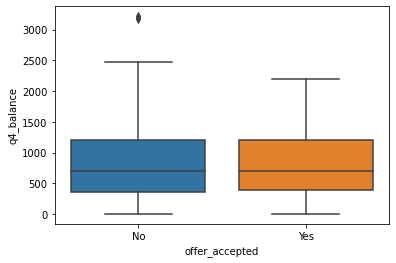

In [1035]:
sns.boxplot(x=df2['offer_accepted'], y=df2['q4_balance'])

<AxesSubplot:xlabel='offer_accepted', ylabel='q4_balance'>

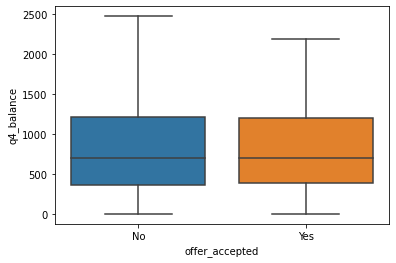

In [1036]:
iqr2_4 = np.percentile(df2['q4_balance'],75) - np.percentile(df2['q4_balance'],25)
upper_limit2_4 = np.percentile(df2['q3_balance'],75) + 1.5*iqr2_4
lower_limit2_4 = np.percentile(df2['q3_balance'],25) - 1.5*iqr2_4
df2 = df2[(df2['q4_balance']>lower_limit2_4) & (df2['q4_balance']<upper_limit2_4)]
sns.boxplot(x=df2['offer_accepted'], y=df2['q4_balance'])

In [1037]:
df2['household_size'].value_counts()

3    5703
4    5530
5    2850
2    2805
1     538
6     538
8       1
9       1
Name: household_size, dtype: int64

In [1038]:
df.shape, df2.shape

((17976, 15), (17966, 15))

3. We drop the outliers only with a 95 % upper limit and a 5% lower limit.

In [1039]:
df3=df

<AxesSubplot:xlabel='offer_accepted', ylabel='q1_balance'>

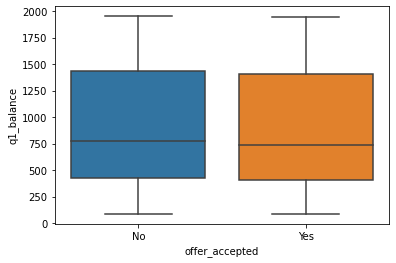

In [1040]:
upper_lim3_1 = df3['q1_balance'].quantile(0.95) 
lower_lim3_1 = df3['q1_balance'].quantile(0.05)
df3 = df3[(df3['q1_balance']>lower_lim3_1) & (df3['q1_balance'] < upper_lim3_1)]
sns.boxplot(x=df3['offer_accepted'], y=df3['q1_balance'])

In [1041]:
df3['household_size'].value_counts()

3    5137
4    4988
5    2563
2    2533
6     480
1     475
8       1
Name: household_size, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='q2_balance'>

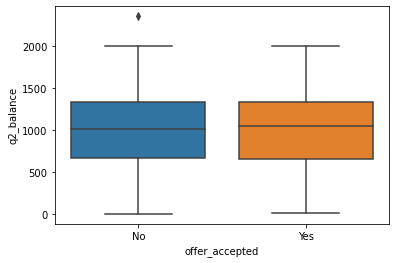

In [1042]:
sns.boxplot(x=df3['offer_accepted'], y=df3['q2_balance'])

<AxesSubplot:xlabel='offer_accepted', ylabel='q2_balance'>

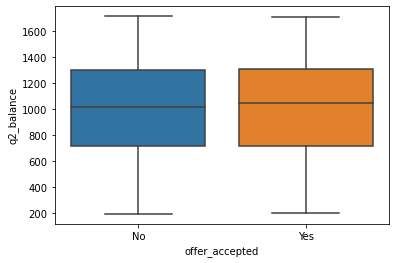

In [1043]:
upper_lim3_2 = df3['q2_balance'].quantile(0.95) 
lower_lim3_2 = df3['q2_balance'].quantile(0.05)
df3 = df3[(df3['q2_balance']>lower_lim3_2) & (df3['q2_balance'] < upper_lim3_2)]
sns.boxplot(x=df3['offer_accepted'], y=df3['q2_balance'])

In [1044]:
df3['household_size'].value_counts()

3    4657
4    4490
5    2284
2    2261
6     431
1     426
8       1
Name: household_size, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='q3_balance'>

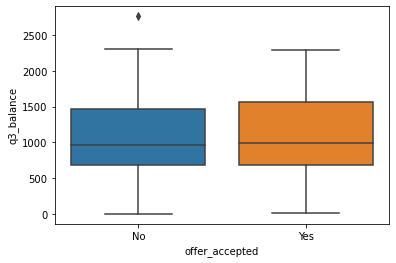

In [1045]:
sns.boxplot(x=df3['offer_accepted'], y=df3['q3_balance'])

<AxesSubplot:xlabel='offer_accepted', ylabel='q3_balance'>

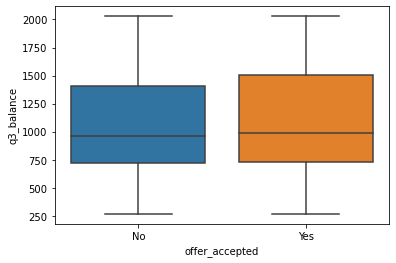

In [1046]:
upper_lim3_3 = df3['q3_balance'].quantile(0.95) 
lower_lim3_3 = df3['q3_balance'].quantile(0.05)
df3 = df3[(df3['q3_balance']>lower_lim3_3) & (df3['q3_balance'] < upper_lim3_3)]
sns.boxplot(x=df3['offer_accepted'], y=df3['q3_balance'])

In [1047]:
df3['household_size'].value_counts()

3    4211
4    3999
5    2053
2    2045
1     397
6     387
8       1
Name: household_size, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='q4_balance'>

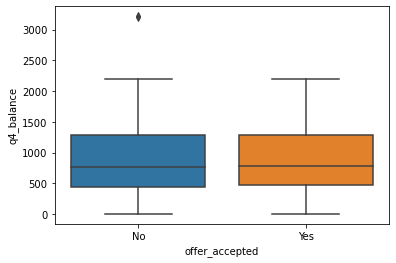

In [1048]:
sns.boxplot(x=df3['offer_accepted'], y=df3['q4_balance'])

<AxesSubplot:xlabel='offer_accepted', ylabel='q4_balance'>

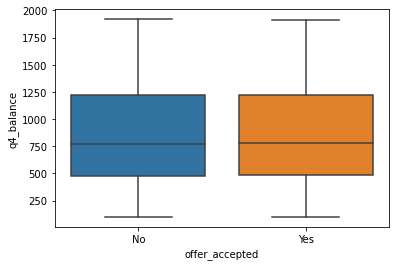

In [1049]:
upper_lim3_4 = df3['q4_balance'].quantile(0.95) 
lower_lim3_4 = df3['q4_balance'].quantile(0.05)
df3 = df3[(df3['q4_balance']>lower_lim3_4) & (df3['q4_balance'] < upper_lim3_4)]
sns.boxplot(x=df3['offer_accepted'], y=df3['q4_balance'])

In [1050]:
df3['household_size'].value_counts()

3    3806
4    3573
5    1849
2    1847
1     356
6     346
8       1
Name: household_size, dtype: int64

-> yes, we accept the new results. Create a bin.

## Pre-Processing

In [1051]:
df1_cat = df1.select_dtypes(include = np.object)

In [1052]:
df1_cat

offer_accepted     reward mailer_type income_level overdraft_protection  \
0                 No  Air Miles      Letter         High                   No   
1                 No  Air Miles      Letter       Medium                   No   
2                 No  Air Miles    Postcard         High                   No   
3                 No  Air Miles      Letter       Medium                   No   
4                 No  Air Miles      Letter       Medium                   No   
...              ...        ...         ...          ...                  ...   
17995             No  Cash Back      Letter         High                   No   
17996             No  Cash Back      Letter         High                   No   
17997             No  Cash Back      Letter         High                   No   
17998             No  Cash Back      Letter       Medium                   No   
17999             No  Cash Back      Letter          Low                   No   

      credit_rating own_your_home  
0              High            No  
1            Medium           Yes  
2            Medium           Yes  
3              High            No  
4            Medium           Yes  
...             ...           ...  
17995           Low           Yes  
17996           Low           Yes  
17997           Low            No  
17998        Medium           Yes  
17999        Medium            No  

[17976 rows x 7 columns]

In [1053]:
y1 = df1_cat['offer_accepted']
y1

0        No
1        No
2        No
3        No
4        No
         ..
17995    No
17996    No
17997    No
17998    No
17999    No
Name: offer_accepted, Length: 17976, dtype: object

In [1054]:
df1_cat = df1_cat.drop(['offer_accepted'], axis=1)
df1_cat

reward mailer_type income_level overdraft_protection credit_rating  \
0      Air Miles      Letter         High                   No          High   
1      Air Miles      Letter       Medium                   No        Medium   
2      Air Miles    Postcard         High                   No        Medium   
3      Air Miles      Letter       Medium                   No          High   
4      Air Miles      Letter       Medium                   No        Medium   
...          ...         ...          ...                  ...           ...   
17995  Cash Back      Letter         High                   No           Low   
17996  Cash Back      Letter         High                   No           Low   
17997  Cash Back      Letter         High                   No           Low   
17998  Cash Back      Letter       Medium                   No        Medium   
17999  Cash Back      Letter          Low                   No        Medium   

      own_your_home  
0                No  
1               Yes  
2               Yes  
3                No  
4               Yes  
...             ...  
17995           Yes  
17996           Yes  
17997            No  
17998           Yes  
17999            No  

[17976 rows x 6 columns]

In [1055]:
df2_cat = df2.select_dtypes(include = np.object)

In [1056]:
y2 = df2['offer_accepted']

In [1057]:
df2 = df2.drop(['offer_accepted'], axis=1)

In [1058]:
df3_cat = df3.select_dtypes(include = np.object)

In [1059]:
y3 = df3_cat['offer_accepted']

In [1060]:
df3_cat = df3_cat.drop(['offer_accepted'], axis=1)

## Encode our categorical variables

- We do not know the relationship between your target variable and categorical features.

- encoded tha categorical values -> get_dummies_method

In [1061]:
categorical1 = pd.get_dummies(df1_cat,
drop_first=True,
columns=['reward', 'mailer_type', 'income_level', 'overdraft_protection', 'credit_rating', 'own_your_home'])

In [1062]:
categorical1

reward_Cash Back  reward_Points  mailer_type_Postcard  \
0                     0              0                     0   
1                     0              0                     0   
2                     0              0                     1   
3                     0              0                     0   
4                     0              0                     0   
...                 ...            ...                   ...   
17995                 1              0                     0   
17996                 1              0                     0   
17997                 1              0                     0   
17998                 1              0                     0   
17999                 1              0                     0   

       income_level_Low  income_level_Medium  overdraft_protection_Yes  \
0                     0                    0                         0   
1                     0                    1                         0   
2                     0                    0                         0   
3                     0                    1                         0   
4                     0                    1                         0   
...                 ...                  ...                       ...   
17995                 0                    0                         0   
17996                 0                    0                         0   
17997                 0                    0                         0   
17998                 0                    1                         0   
17999                 1                    0                         0   

       credit_rating_Low  credit_rating_Medium  own_your_home_Yes  
0                      0                     0                  0  
1                      0                     1                  1  
2                      0                     1                  1  
3                      0                     0                  0  
4                      0                     1                  1  
...                  ...                   ...                ...  
17995                  1                     0                  1  
17996                  1                     0                  1  
17997                  1                     0                  0  
17998                  0                     1                  1  
17999                  0                     1                  0  

[17976 rows x 9 columns]

- Standardize the numerical variables

In [1063]:
df1_num = df1.select_dtypes(include = np.number)

In [1064]:
df1_num

bank_accounts_open  credit_cards_held  homes_owned  household_size  \
0                       1                  2            1               4   
1                       1                  2            2               5   
2                       2                  2            1               2   
3                       2                  1            1               4   
4                       1                  2            1               6   
...                   ...                ...          ...             ...   
17995                   1                  1            1               5   
17996                   1                  3            1               3   
17997                   1                  2            1               4   
17998                   1                  4            2               2   
17999                   2                  2            1               3   

       q1_balance  q2_balance  q3_balance  q4_balance  
0          1669.0       877.0      1095.0      1002.0  
1            39.0       106.0        78.0       366.0  
2           367.0       352.0       145.0       242.0  
3          1578.0      1760.0      1119.0       419.0  
4          2140.0      1357.0       982.0       365.0  
...           ...         ...         ...         ...  
17995       136.0        65.0        71.0       398.0  
17996       984.0       940.0       943.0       535.0  
17997       918.0       767.0      1170.0      1494.0  
17998       626.0       983.0       865.0      1615.0  
17999       265.0      1378.0      1978.0       603.0  

[17976 rows x 8 columns]

In [1065]:
df1a_num = df1_num.copy()

change the numrical data into categorical data -> df1a_num

In [1066]:
df1a_num['bank_accounts_open'] = df1a_num['bank_accounts_open'].astype(str)

In [1067]:
df1a_num['credit_cards_held'] = df1a_num['credit_cards_held'].astype(str)

In [1068]:
df1a_num['homes_owned'] = df1a_num['homes_owned'].astype(str)

In [1069]:
df1a_num['household_size'] = df1a_num['household_size'].astype(str)

In [1070]:
df1a_num.dtypes

bank_accounts_open     object
credit_cards_held      object
homes_owned            object
household_size         object
q1_balance            float64
q2_balance            float64
q3_balance            float64
q4_balance            float64
dtype: object

In [1071]:
df1_num.dtypes

bank_accounts_open      int64
credit_cards_held       int64
homes_owned             int64
household_size          int64
q1_balance            float64
q2_balance            float64
q3_balance            float64
q4_balance            float64
dtype: object

In [1072]:
df1a_num['bank_accounts_open'].value_counts()

1    13674
2     4007
3      295
Name: bank_accounts_open, dtype: int64

In [1073]:
def col_bank_accounts_open(x):
    if "1" in x:
        return '1_account'
    elif "2" in x:
        return '2_accounts'
    elif "3" in x:
        return '3_accounts'
    else:
        return 'unknown'

In [1074]:
df1a_num['bank_accounts_open'] = df1a_num['bank_accounts_open'].apply(col_bank_accounts_open)

In [1075]:
df1a_num['bank_accounts_open'].value_counts()

1_account     13674
2_accounts     4007
3_accounts      295
Name: bank_accounts_open, dtype: int64

In [1076]:
df1a_num['credit_cards_held'].value_counts()

2    7933
1    6147
3    3381
4     515
Name: credit_cards_held, dtype: int64

In [1077]:
def col_credit_cards_held(x):
    if "1" in x:
        return '1_card'
    elif "2" in x:
        return '2_cards'
    elif "3" in x:
        return '3_cards'
    elif "4" in x:
        return '4_cards'
    else:
        return 'unknown'

In [ ]:
def col_offer_accepted(x):
    if "Yes" in x:
        return '1'
    elif "No" in x:
        return '0'
    else:
        return 'unknown'

In [1078]:
df1a_num['offer_accepted'] = df1a_num['offer_accepted'].apply(col_offer_accepted)

In [1079]:
df1a_num['credit_cards_held'].value_counts()

2_cards    7933
1_card     6147
3_cards    3381
4_cards     515
Name: credit_cards_held, dtype: int64

In [1080]:
df1a_num['homes_owned'].value_counts()

1    14502
2     3289
3      185
Name: homes_owned, dtype: int64

In [1081]:
def col_homes_owned(x):
    if "1" in x:
        return '1_house'
    elif "2" in x:
        return '2_houses'
    elif "3" in x:
        return '3_houses'
    else:
        return 'unknown'

In [1082]:
df1a_num['homes_owned'] = df1a_num['homes_owned'].apply(col_homes_owned)

In [1083]:
df1a_num['homes_owned'].value_counts()

1_house     14502
2_houses     3289
3_houses      185
Name: homes_owned, dtype: int64

In [1084]:
df1a_cat = df1a_num.select_dtypes(include = np.object)

In [1085]:
df1a_cat

bank_accounts_open credit_cards_held homes_owned household_size
0              1_account           2_cards     1_house              4
1              1_account           2_cards    2_houses              5
2             2_accounts           2_cards     1_house              2
3             2_accounts            1_card     1_house              4
4              1_account           2_cards     1_house              6
...                  ...               ...         ...            ...
17995          1_account            1_card     1_house              5
17996          1_account           3_cards     1_house              3
17997          1_account           2_cards     1_house              4
17998          1_account           4_cards    2_houses              2
17999         2_accounts           2_cards     1_house              3

[17976 rows x 4 columns]

In [1086]:
df1a_num = df1a_num.select_dtypes(include = np.number)

In [1087]:
df1a_num

q1_balance  q2_balance  q3_balance  q4_balance
0          1669.0       877.0      1095.0      1002.0
1            39.0       106.0        78.0       366.0
2           367.0       352.0       145.0       242.0
3          1578.0      1760.0      1119.0       419.0
4          2140.0      1357.0       982.0       365.0
...           ...         ...         ...         ...
17995       136.0        65.0        71.0       398.0
17996       984.0       940.0       943.0       535.0
17997       918.0       767.0      1170.0      1494.0
17998       626.0       983.0       865.0      1615.0
17999       265.0      1378.0      1978.0       603.0

[17976 rows x 4 columns]

In [1088]:
categorical1_1 = pd.get_dummies(df1a_cat,
drop_first=True,
columns=['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size'])

In [1089]:
categorical1_1

bank_accounts_open_2_accounts  bank_accounts_open_3_accounts  \
0                                  0                              0   
1                                  0                              0   
2                                  1                              0   
3                                  1                              0   
4                                  0                              0   
...                              ...                            ...   
17995                              0                              0   
17996                              0                              0   
17997                              0                              0   
17998                              0                              0   
17999                              1                              0   

       credit_cards_held_2_cards  credit_cards_held_3_cards  \
0                              1                          0   
1                              1                          0   
2                              1                          0   
3                              0                          0   
4                              1                          0   
...                          ...                        ...   
17995                          0                          0   
17996                          0                          1   
17997                          1                          0   
17998                          0                          0   
17999                          1                          0   

       credit_cards_held_4_cards  homes_owned_2_houses  homes_owned_3_houses  \
0                              0                     0                     0   
1                              0                     1                     0   
2                              0                     0                     0   
3                              0                     0                     0   
4                              0                     0                     0   
...                          ...                   ...                   ...   
17995                          0                     0                     0   
17996                          0                     0                     0   
17997                          0                     0                     0   
17998                          1                     1                     0   
17999                          0                     0                     0   

       household_size_2  household_size_3  household_size_4  household_size_5  \
0                     0                 0                 1                 0   
1                     0                 0                 0                 1   
2                     1                 0                 0                 0   
3                     0                 0                 1                 0   
4                     0                 0                 0                 0   
...                 ...               ...               ...               ...   
17995                 0                 0                 0                 1   
17996                 0                 1                 0                 0   
17997                 0                 0                 1                 0   
17998                 1                 0                 0                 0   
17999                 0                 1                 0                 0   

       household_size_6  household_size_8  household_size_9  
0                     0                 0                 0  
1                     0                 0                 0  
2                     0                 0                 0  
3                     0                 0                 0  
4                     1                 0                 0  
...                 ...               ...               ...  
17995                 0      

In [1090]:
df1a_num

q1_balance  q2_balance  q3_balance  q4_balance
0          1669.0       877.0      1095.0      1002.0
1            39.0       106.0        78.0       366.0
2           367.0       352.0       145.0       242.0
3          1578.0      1760.0      1119.0       419.0
4          2140.0      1357.0       982.0       365.0
...           ...         ...         ...         ...
17995       136.0        65.0        71.0       398.0
17996       984.0       940.0       943.0       535.0
17997       918.0       767.0      1170.0      1494.0
17998       626.0       983.0       865.0      1615.0
17999       265.0      1378.0      1978.0       603.0

[17976 rows x 4 columns]

- standardization of numerical variable

In [1091]:
from sklearn.preprocessing import MinMaxScaler

transformer1a = MinMaxScaler().fit(df1a_num)
x1a_mmscaled = transformer1a.transform(df1a_num)
print(x1a_mmscaled.shape)


(17976, 4)


In [1092]:
x1a_mmscaled

array([[0.48376812, 0.25635779, 0.28642427, 0.23772242],
       [0.01130435, 0.03098509, 0.02040283, 0.08683274],
       [0.10637681, 0.10289389, 0.03792833, 0.057414  ],
       ...,
       [0.26608696, 0.22420345, 0.30604238, 0.3544484 ],
       [0.18144928, 0.28734288, 0.2262621 , 0.3831554 ],
       [0.07681159, 0.4028062 , 0.51739472, 0.1430605 ]])

In [1093]:
df1_num

bank_accounts_open  credit_cards_held  homes_owned  household_size  \
0                       1                  2            1               4   
1                       1                  2            2               5   
2                       2                  2            1               2   
3                       2                  1            1               4   
4                       1                  2            1               6   
...                   ...                ...          ...             ...   
17995                   1                  1            1               5   
17996                   1                  3            1               3   
17997                   1                  2            1               4   
17998                   1                  4            2               2   
17999                   2                  2            1               3   

       q1_balance  q2_balance  q3_balance  q4_balance  
0          1669.0       877.0      1095.0      1002.0  
1            39.0       106.0        78.0       366.0  
2           367.0       352.0       145.0       242.0  
3          1578.0      1760.0      1119.0       419.0  
4          2140.0      1357.0       982.0       365.0  
...           ...         ...         ...         ...  
17995       136.0        65.0        71.0       398.0  
17996       984.0       940.0       943.0       535.0  
17997       918.0       767.0      1170.0      1494.0  
17998       626.0       983.0       865.0      1615.0  
17999       265.0      1378.0      1978.0       603.0  

[17976 rows x 8 columns]

In [1094]:
from sklearn.preprocessing import MinMaxScaler

transformer1 = MinMaxScaler().fit(df1_num)
x1_mmscaled = transformer1.transform(df1_num)
x1_mmscaled.shape

(17976, 8)

In [1095]:
x1_num = pd.DataFrame(x1_mmscaled, columns=df1_num.columns)
x1_num

bank_accounts_open  credit_cards_held  homes_owned  household_size  \
0                     0.0           0.333333          0.0           0.375   
1                     0.0           0.333333          0.5           0.500   
2                     0.5           0.333333          0.0           0.125   
3                     0.5           0.000000          0.0           0.375   
4                     0.0           0.333333          0.0           0.625   
...                   ...                ...          ...             ...   
17971                 0.0           0.000000          0.0           0.500   
17972                 0.0           0.666667          0.0           0.250   
17973                 0.0           0.333333          0.0           0.375   
17974                 0.0           1.000000          0.5           0.125   
17975                 0.5           0.333333          0.0           0.250   

       q1_balance  q2_balance  q3_balance  q4_balance  
0        0.483768    0.256358    0.286424    0.237722  
1        0.011304    0.030985    0.020403    0.086833  
2        0.106377    0.102894    0.037928    0.057414  
3        0.457391    0.514469    0.292702    0.099407  
4        0.620290    0.396668    0.256866    0.086595  
...           ...         ...         ...         ...  
17971    0.039420    0.019000    0.018572    0.094425  
17972    0.285217    0.274773    0.246665    0.126928  
17973    0.266087    0.224203    0.306042    0.354448  
17974    0.181449    0.287343    0.226262    0.383155  
17975    0.076812    0.402806    0.517395    0.143060  

[17976 rows x 8 columns]

In [1096]:
x1_num.shape

(17976, 8)

In [1097]:
y1.shape

(17976,)

In [1098]:
X1 = np.concatenate((x_num, categorical1_1), axis=1)

In [1099]:
X1.shape

(17976, 22)

In [1100]:
y1.head

<bound method NDFrame.head of 0        No
1        No
2        No
3        No
4        No
         ..
17995    No
17996    No
17997    No
17998    No
17999    No
Name: offer_accepted, Length: 17976, dtype: object>

In [1101]:
Yy = pd.get_dummies(y1,
drop_first=True,
columns=['offer_accepted'])

In [1102]:
Yy

Yes
0        0
1        0
2        0
3        0
4        0
...    ...
17995    0
17996    0
17997    0
17998    0
17999    0

[17976 rows x 1 columns]

In [1103]:
Y1=Yy.copy()

In [1104]:
Y1.value_counts()

Yes
0      16955
1       1021
dtype: int64

- Apply the log. Regression

In [1105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [1106]:
X1_train, X1_test, Y1_train, Y1_test =train_test_split(X1, Y1, test_size= 0.4, random_state=40)

In [1107]:
from sklearn.metrics import accuracy_score 

In [1108]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X1_train, Y1_train)

In [1109]:
predictions = classification.predict(X1_test)

In [1110]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [1111]:
accuracy_score(Y1_test, predictions)

0.9411764705882353

In [1112]:
import sklearn.metrics as metrics 

In [1119]:
probs = classification.predict_proba(X1_test)
preds =probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y1_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.5


In [1120]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

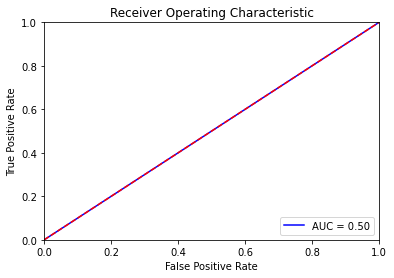

In [1121]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

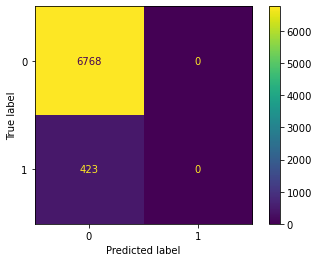

In [1117]:
accuracy_score(y1_test,predictions)
confusion_matrix(y1_test,predictions)
plot_confusion_matrix(classification, X1_test, y1_test)
plt.show()

In [1125]:
MAE = mean_absolute_error(y1_test,predictions)
MSE = mean_squared_error(y1_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y1_test,predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:  15.00
The mean squared error of the model in the test set is:   0.06
The root mean squared error of the model in the test set is:   0.24
The R2 of the model in the test set is: -0.06


# KNN-Model

In [1122]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X1_train, y1_train)

KNeighborsRegressor(n_neighbors=4)

In [1123]:
knn_predictions = knn_model.predict(X1_test)

In [1124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y1_test,knn_predictions)
MSE = mean_squared_error(y1_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y1_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.11
The mean squared error of the model in the test set is:   0.07
The root mean squared error of the model in the test set is:   0.26
The R2 of the model in the test set is: -0.24


Visualize the KNN

In [1126]:
from mlxtend.plotting import plot_decision_regions

In [1127]:
def knn_comparison(data, k):
    x = df1.iloc[:, 0:2].values
    y = df1.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X1, y1)

    plt.figure(figsize=(16,12))
    plot_decision_regions(X1, y1, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show()

In [1135]:
new = pd.concat([X1,y1],axis=1)
new.head()

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [1133]:
knn_comparison(new,1)

ValueError: y must be a NumPy array. Found <class 'pandas.core.series.Series'>

<Figure size 1152x864 with 0 Axes>

In [1137]:
from imblearn.over_sampling import SMOTE

In [1139]:
smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X1,y1)
y_sm.value_counts()

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [1140]:
from imblearn.under_sampling import TomekLinks

In [1141]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X1, y1)
y_tl.value_counts()

AttributeError: 'TomekLinks' object has no attribute 'fit_sample'